In [8]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [3]:
# Load trip data
df_trips = pd.read_parquet('./data/SEQ_PT_Trips.parquet')

# Load stop information and remove unnecessary columns
df_stops = pd.read_csv('./data/stops.txt')
df_stops['stop_code'] = pd.to_numeric(df_stops['stop_code'], errors='coerce').fillna(-1).astype(int)
df_stops = df_stops.iloc[:, :7]


In [4]:
df_trips

operator    month route direction  \
0        Transport for Brisbane  2022-01   175  Outbound   
1        Transport for Brisbane  2022-01   227  Outbound   
2        Transport for Brisbane  2022-01   227  Outbound   
3        Transport for Brisbane  2022-01   227  Outbound   
4        Transport for Brisbane  2022-01   227  Outbound   
...                         ...      ...   ...       ...   
8835758  Transport for Brisbane  2023-08   192  Outbound   
8835759  Transport for Brisbane  2023-08   192  Outbound   
8835760  Transport for Brisbane  2023-08   192  Outbound   
8835761  Transport for Brisbane  2023-08   192  Outbound   
8835762   Sunbus Sunshine Coast  2023-08   620     South   

                                time ticket_type  origin_stop  \
0                            Weekend     go card        10309   
1         Weekday (3:00pm-6:59:59pm)     go card          228   
2         Weekday (3:00pm-6:59:59pm)     go card          226   
3         Weekday (3:00pm-6:59:59pm)     go card          226   
4         Weekday (3:00pm-6:59:59pm)     go card          226   
...                              ...         ...          ...   
8835758   Weekday (3:00pm-6:59:59pm)     go card           36   
8835759   Weekday (3:00pm-6:59:59pm)     go card           36   
8835760   Weekday (3:00pm-6:59:59pm)     go card           36   
8835761   Weekday (3:00pm-6:59:59pm)     go card           36   
8835762  Weekday (12:00am-8:29:59am)     go card       320843   

         destination_stop  quantity  
0                    2232         1  
1                    1308         1  
2                    6126         4  
3                    6027         9  
4                    5914         2  
...                   ...       ...  
8835758              1053         6  
8835759              1051        78  
8835760              1049        41  
8835761              1128         5  
8835762            301781         9  

[8835763 rows x 9 columns]

In [5]:
df_stops

stop_id  stop_code                                 stop_name  \
0                 1          1    Herschel Street Stop 1 near North Quay   
1                10         10  Ann Street Stop 10 at King George Square   
2               100        100           Parliament Stop 94A Margaret St   
3              1000       1000               Handford Rd at Songbird Way   
4             10000      10000                Balcara Ave near Allira Cr   
...             ...        ...                                       ...   
13025  place_pinesc         -1                 The Pines Shopping Centre   
13026  place_inttbl         -1       Toombul Shopping Centre interchange   
13027  place_scuniv         -1  University of the Sunshine Coast station   
13028   place_intuq         -1                      UQ Chancellors Place   
13029  place_vptsta         -1                    Victoria Point Central   

       stop_desc   stop_lat    stop_lon zone_id  
0            NaN -27.467834  153.019079       1  
1            NaN -27.468003  153.023970       1  
2            NaN -27.473751  153.026745       1  
3            NaN -27.339069  153.043907       2  
4            NaN -27.344106  153.024982       2  
...          ...        ...         ...     ...  
13025        NaN -28.134660  153.469767     NaN  
13026        NaN -27.408269  153.059963     NaN  
13027        NaN -26.718756  153.062004     NaN  
13028        NaN -27.497970  153.011136     NaN  
13029        NaN -27.585866  153.282032     NaN  

[13030 rows x 7 columns]

In [8]:
df['quantity'].describe()

count     8835763.0
mean      19.656306
std      120.566765
min             1.0
25%             1.0
50%             3.0
75%            10.0
max         14235.0
Name: quantity, dtype: Float64

In [9]:
geometry = [Point(lon, lat) for lon, lat in zip(df_stops['stop_lon'], df_stops['stop_lat'])]
gdf = gpd.GeoDataFrame(df_stops, geometry=geometry)

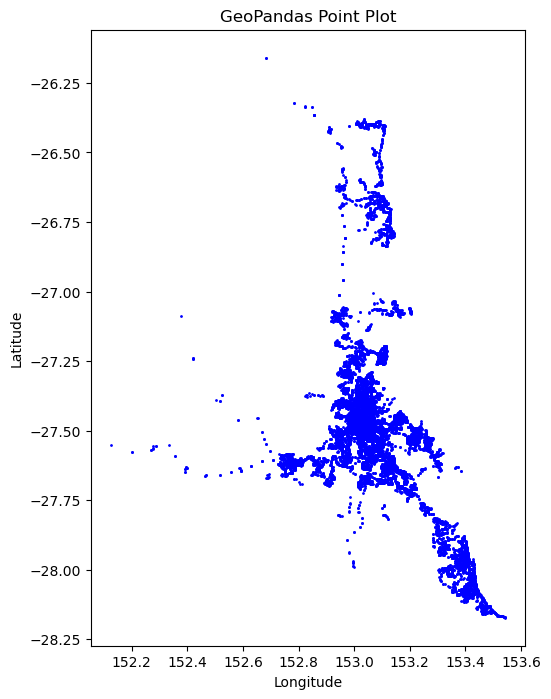

In [13]:
gdf.plot(marker='o', color='blue', markersize=1, figsize=(8, 8))
plt.title('GeoPandas Point Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [14]:
gdf.explore("stop_name", legend=False)